In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         8000 non-null   float64
 1   Weight       8000 non-null   float64
 2   Sweetness    8000 non-null   float64
 3   Softness     8000 non-null   float64
 4   HarvestTime  8000 non-null   float64
 5   Ripeness     8000 non-null   float64
 6   Acidity      8000 non-null   float64
 7   Quality      8000 non-null   object 
dtypes: float64(7), object(1)
memory usage: 500.1+ KB


/tmp/ipython-input-2278915404.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Quality', data=df, palette='coolwarm')


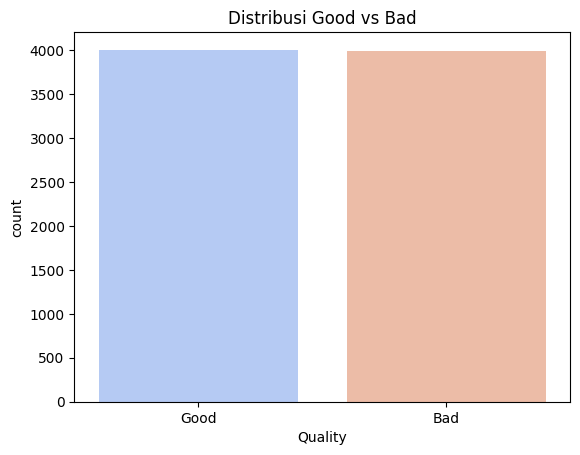

In [2]:
df = pd.read_csv('pisang.csv')
df.head()
df.info()
df.describe()
df['Quality'].value_counts()

sns.countplot(x='Quality', data=df, palette='coolwarm')
plt.title('Distribusi Good vs Bad')
plt.show()


In [3]:
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()


,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity,Quality_Good
0,-1.924968,0.468078,3.077832,-1.472177,0.294799,2.435570,0.271290,True
1,-2.409751,0.486870,0.346921,-2.495099,-0.892213,2.067549,0.307325,True
2,-0.357607,1.483176,1.568452,-2.645145,-0.647267,3.090643,1.427322,True
3,-0.868524,1.566201,1.889605,-1.273761,-1.006278,1.873001,0.477862,True
4,0.651825,1.319199,-0.022459,-1.209709,-1.430692,1.078345,2.812442,True


In [4]:
X = df_encoded.drop('Quality_Good', axis=1)
y = df_encoded['Quality_Good']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Ukuran data train:', X_train.shape)
print('Ukuran data test:', X_test.shape)


Ukuran data train: (6400, 7)
Ukuran data test: (1600, 7)


In [5]:
model = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)
model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5, random_state=42)

In [6]:
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print('Akurasi Model: ', acc)
print('Confusion Matrix: ', cm)
print('Classification Report: ', classification_report(y_test, y_pred))


Akurasi Model:  0.90375
Confusion Matrix:  [[712  69]
 [ 85 734]]
Classification Report:                precision    recall  f1-score   support

       False       0.89      0.91      0.90       781
        True       0.91      0.90      0.91       819

    accuracy                           0.90      1600
   macro avg       0.90      0.90      0.90      1600
weighted avg       0.90      0.90      0.90      1600



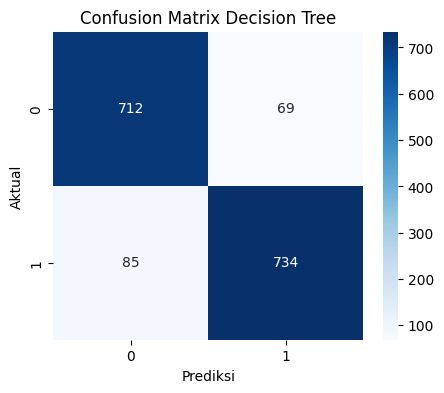

In [7]:
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix Decision Tree')
plt.show()


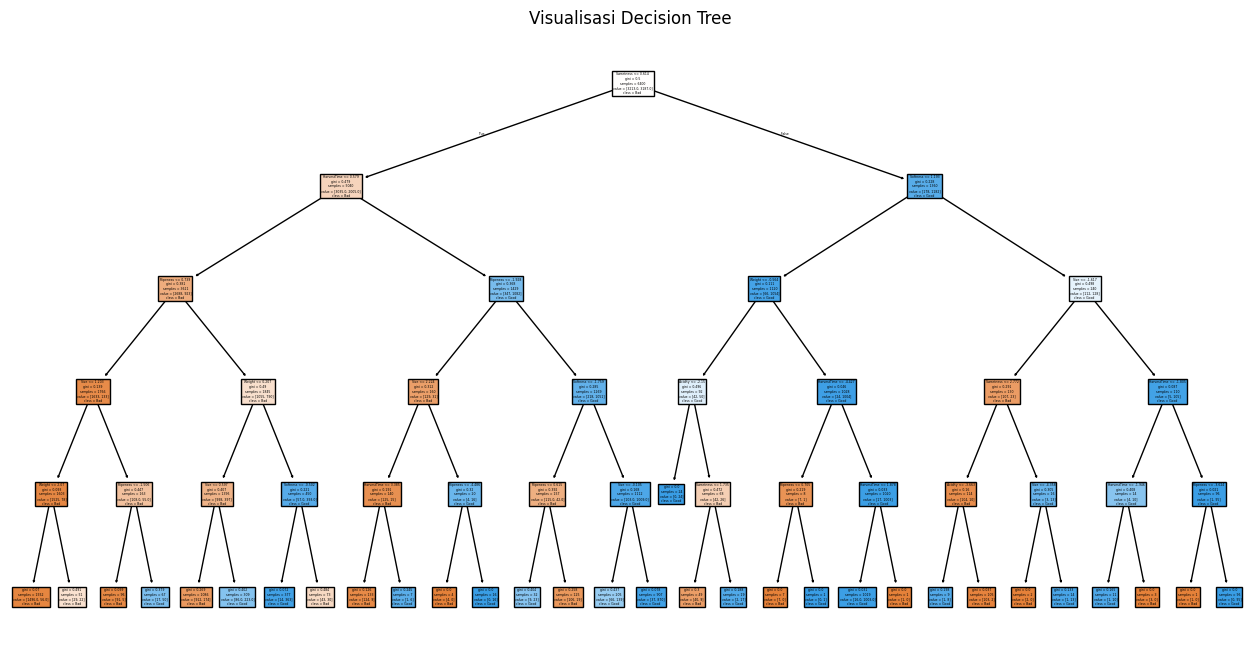

In [8]:
plt.figure(figsize=(16,8))
tree.plot_tree(model, feature_names=X.columns, class_names=['Bad','Good'], filled=True)
plt.title('Visualisasi Decision Tree')
plt.show()


=== Matriks Korelasi ===
                 Size    Weight  Sweetness  Softness  HarvestTime  Ripeness  \
Size         1.000000 -0.181933  -0.258027  0.164526     0.582014  0.042587   
Weight      -0.181933  1.000000   0.422683 -0.189908    -0.079465 -0.035276   
Sweetness   -0.258027  0.422683   1.000000 -0.095338    -0.201657  0.180095   
Softness     0.164526 -0.189908  -0.095338  1.000000     0.194734 -0.253804   
HarvestTime  0.582014 -0.079465  -0.201657  0.194734     1.000000  0.107127   
Ripeness     0.042587 -0.035276   0.180095 -0.253804     0.107127  1.000000   
Acidity     -0.140673  0.443879   0.187059 -0.146014    -0.090903 -0.351531   

              Acidity  
Size        -0.140673  
Weight       0.443879  
Sweetness    0.187059  
Softness    -0.146014  
HarvestTime -0.090903  
Ripeness    -0.351531  
Acidity      1.000000  


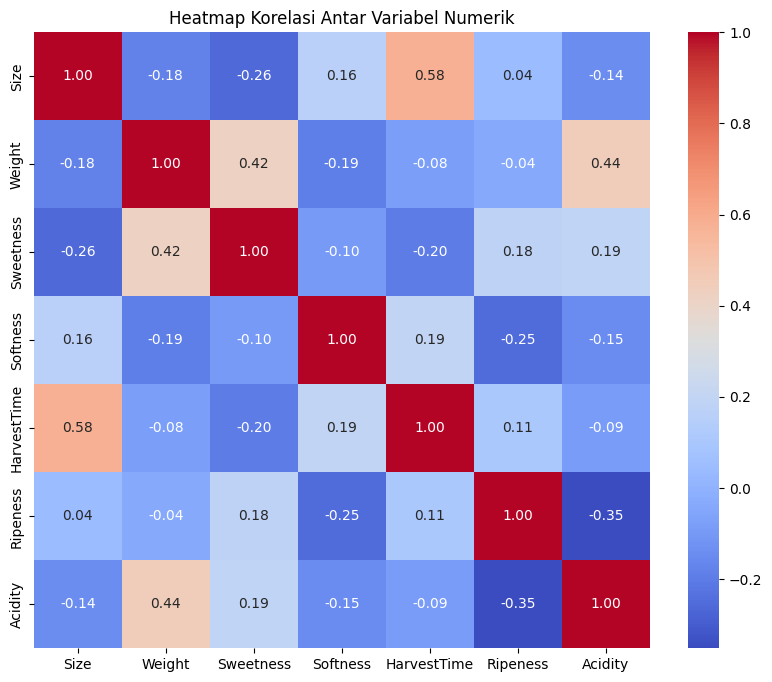

In [9]:
# Ambil hanya kolom numerik
numeric_cols = df.select_dtypes(include=["float64"])

# Hitung matriks korelasi
corr_matrix = numeric_cols.corr()

# Tampilkan tabel korelasi
print("=== Matriks Korelasi ===")
print(corr_matrix)

# Visualisasi heatmap korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Heatmap Korelasi Antar Variabel Numerik")
plt.show()